Loading Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as SS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras import metrics

Loading Dataset

In [2]:
data=pd.read_csv('Dataset_final-all - Re-28Dec24 - Copy.csv')
print(data.head(10))

   morphology     dye    Jsc    Voc    FF  efficiency  Passivation
0           1    N719  12.70  677.0  50.0         4.3            0
1           1    Z907  17.10  450.0  47.0         3.7            0
2           1    N719  11.10  517.0  54.0         3.1            0
3           1    N719   9.50  437.0  59.0         2.4            0
4           1      N3   7.90  467.0  55.0         2.0            0
5           1    N719  11.00  356.0  36.0         2.0            0
6           1      N3  17.20  280.0  37.0         1.8            0
7           1    N719   8.02  345.0  49.0         1.4            0
8           1    N719   3.64  510.0  55.0         1.0            0
9           1  Ru 535   7.63  350.0  43.0         1.1            0


In [ ]:
data['dye'].value_counts()

Encoding Dye Column

In [ ]:
data['dye'] = pd.factorize(data['dye'])[0] + 1
data['dye'].value_counts()

X -> Contains Independent Variable

Y -> Contains Dependent Variable 

In [5]:
X = data.drop(columns =["efficiency"]).values
y = data["efficiency"].values

Test Train Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Check for NaN(Null) values

In [7]:
import numpy as np
nan_present = np.isnan(X_train).any()
if nan_present:
    print("NaN values are present in X_train.")

    nan_indices = np.argwhere(np.isnan(X_train))
    print("Indices of NaN values:")
    print(nan_indices)
else:
    print("No NaN values in X_train.")

valid_rows_train = ~np.isnan(X_train).any(axis=1)  
X_train_cleaned = X_train[valid_rows_train]
y_train_cleaned = y_train[valid_rows_train]

print("Cleaned X_train and y_train:")
print(X_train_cleaned)
print(y_train_cleaned)
valid_rows_test = ~np.isnan(X_test).any(axis=1)  
X_test_cleaned = X_test[valid_rows_test]
y_test_cleaned = y_test[valid_rows_test]

print("Cleaned X_test and y_test:")
print(X_test_cleaned)
print(y_test_cleaned)


No NaN values in X_train.
Cleaned X_train and y_train:
[[  1.       1.       2.     414.      50.6      0.    ]
 [  2.       7.       9.3    524.      50.       0.    ]
 [  3.       3.       7.3    700.      60.       0.    ]
 ...
 [  2.       1.      17.1    760.      61.       1.    ]
 [  3.       1.      11.9    503.      59.       1.    ]
 [  2.       1.       0.9372 297.      75.       1.    ]]
[0.4   2.2   3.    1.4   5.6   4.6   1.1   1.3   8.    0.5   3.8   0.5
 3.    3.6   5.7   3.4   0.419 4.    5.2   1.5   9.5   5.3   5.    0.9
 3.7   2.8   2.    7.    0.641 7.9   4.9   2.4   0.377 5.    4.7   3.1
 3.6   3.3   0.6   1.8   4.7   1.8   5.5   4.3   4.6   2.3   4.2   1.4
 6.4   5.6   1.7   1.6   1.    3.5   5.6   1.8   5.4   5.2   2.    4.7
 0.7   0.3   3.    6.1   1.7   2.1   1.    4.3   3.6   7.2   4.1   0.097
 1.1   3.4   0.097 5.3   3.8   6.3   6.3   5.7   6.5   7.3   1.    1.3
 0.6   4.2   3.4   5.4   2.    3.    4.9   3.2   6.8   6.5   2.7   1.7
 5.4   4.6   3.5   7.2   6.

Shape of dataset

In [ ]:
print("Shape of cleaned datasets:")
print("X_train_cleaned shape:", X_train_cleaned.shape)
print("y_train_cleaned shape:", y_train_cleaned.shape)
print("X_test_cleaned shape:", X_test_cleaned.shape)
print("y_test_cleaned shape:", y_test_cleaned.shape)

Normalization 

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import joblib
#scaler = MinMaxScaler()
scaler = StandardScaler()
X_train_cleaned = scaler.fit_transform(X_train_cleaned)
X_test_cleaned = scaler.transform(X_test_cleaned)

'''y_train_cleaned = y_train_cleaned.reshape(-1, 1)
y_test_cleaned = y_test_cleaned.reshape(-1, 1)
y_train_cleaned = scaler.fit_transform(y_train_cleaned)
y_test_cleaned = scaler.transform(y_test_cleaned)'''
# Save the fitted scaler for later use
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [10]:
print('Number of inputs : ',(X_train_cleaned.shape[1]))

Number of inputs :  6


FCN

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import metrics  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Model
model = Sequential()
model.add(Input(shape=(X_train_cleaned.shape[1],))) 
model.add(Dense(2, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', 
              loss='mean_absolute_error',  
              metrics=[metrics.MeanAbsoluteError(), metrics.MeanSquaredError()])
# Train 
history = model.fit(
    X_train_cleaned, y_train_cleaned,
    epochs=2000,
    batch_size=1,
    validation_split=0.3,
    verbose=1
)

#evaluation metrics
y_pred = model.predict(X_test_cleaned)
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)

n = X_test_cleaned.shape[0]
p = X_test_cleaned.shape[1]

# adjusted R² 
# adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print(f"MSE: {mse}")
print(f"R²: {r2}")
# print(f"Adjusted R²: {adj_r2}")


Epoch 1/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3.4593 - mean_absolute_error: 3.4593 - mean_squared_error: 16.0282 - val_loss: 3.0780 - val_mean_absolute_error: 3.0780 - val_mean_squared_error: 14.7908
Epoch 2/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4027 - mean_absolute_error: 3.4027 - mean_squared_error: 15.8115 - val_loss: 2.8346 - val_mean_absolute_error: 2.8346 - val_mean_squared_error: 13.6832
Epoch 3/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.0560 - mean_absolute_error: 3.0560 - mean_squared_error: 13.8674 - val_loss: 2.6634 - val_mean_absolute_error: 2.6634 - val_mean_squared_error: 12.8539
Epoch 4/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8772 - mean_absolute_error: 2.8772 - mean_squared_error: 12.7161 - val_loss: 2.5557 - val_mean_absolute_error: 2.5557 - val_mean_squared_error: 12.1091
Epoch 5/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9071 - mean_absolute_error: 2.9071 - mean_squared_error: 12.7196 - val_l

Scatter Plot

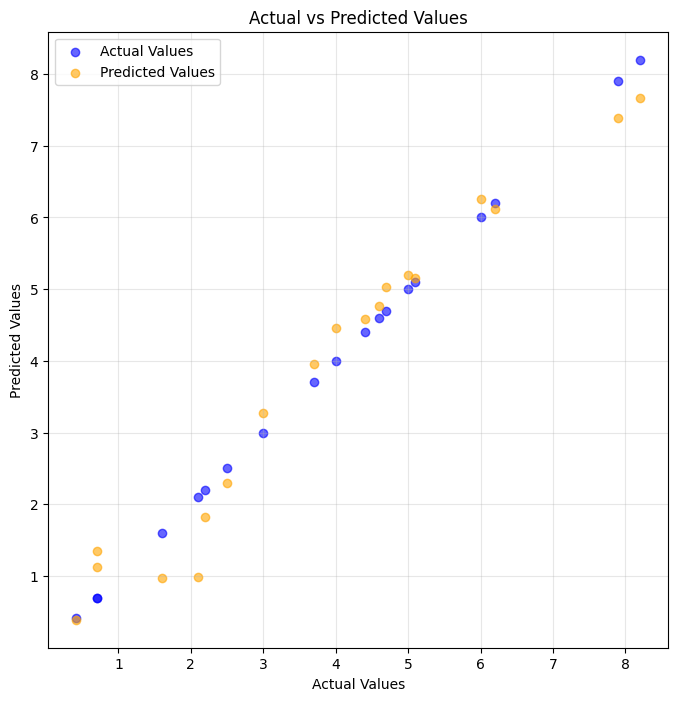

In [12]:
#sns.displot((y_test-predictions),bins=50,kde=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test_cleaned, y_pred, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Test Results

In [13]:
print("Actual vs Predicted Values:")
for actual, predicted in zip(y_test_cleaned[:], y_pred[:]):  
    print(f"Actual: {actual}, Predicted: {predicted[0]}")

Actual vs Predicted Values:
Actual: 3.7, Predicted: 3.952425479888916
Actual: 4.0, Predicted: 4.454004287719727
Actual: 3.0, Predicted: 3.270564556121826
Actual: 7.9, Predicted: 7.391005039215088
Actual: 0.419, Predicted: 0.3906104564666748
Actual: 0.7, Predicted: 1.1193485260009766
Actual: 6.0, Predicted: 6.254992961883545
Actual: 4.4, Predicted: 4.590392112731934
Actual: 2.5, Predicted: 2.2928271293640137
Actual: 5.0, Predicted: 5.1993632316589355
Actual: 6.2, Predicted: 6.123719692230225
Actual: 2.1, Predicted: 0.9918527007102966
Actual: 4.7, Predicted: 5.027378082275391
Actual: 2.2, Predicted: 1.8257932662963867
Actual: 4.6, Predicted: 4.766922473907471
Actual: 0.7, Predicted: 1.3464363813400269
Actual: 1.6, Predicted: 0.9732131958007812
Actual: 5.1, Predicted: 5.150999546051025
Actual: 8.2, Predicted: 7.66609001159668


Saving Model

In [14]:
model.save('FCN.h5')

Wide & Deep NN

In [15]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from tensorflow.keras import metrics


input_shape = X_train_cleaned.shape[1]
inputs = Input(shape=(input_shape,))
wide_branch = Dense(8, activation='relu')(inputs)
deep_branch = Dense(32, activation='relu')(inputs)
deep_branch = Dense(16, activation='relu')(deep_branch)
combined = Concatenate()([wide_branch, deep_branch])
output = Dense(1)(combined)


model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', 
              loss='mean_absolute_error',  # or 'mae'
              metrics=[metrics.MeanAbsoluteError(), metrics.MeanSquaredError()])

# Train 
history = model.fit(X_train_cleaned, y_train_cleaned, epochs=2000, batch_size=1, validation_split=0.3, verbose=1)

y_pred = model.predict(X_test_cleaned)
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)
mae = mean_absolute_error(y_test_cleaned, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Epoch 1/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.5956 - mean_absolute_error: 2.5956 - mean_squared_error: 11.2365 - val_loss: 1.7981 - val_mean_absolute_error: 1.7981 - val_mean_squared_error: 5.7583
Epoch 2/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4354 - mean_absolute_error: 1.4354 - mean_squared_error: 3.8237 - val_loss: 0.7879 - val_mean_absolute_error: 0.7879 - val_mean_squared_error: 5.3126
Epoch 3/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5881 - mean_absolute_error: 0.5881 - mean_squared_error: 0.6799 - val_loss: 0.8010 - val_mean_absolute_error: 0.8010 - val_mean_squared_error: 7.8131
Epoch 4/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4543 - mean_absolute_error: 0.4543 - mean_squared_error: 0.3919 - val_loss: 0.8249 - val_mean_absolute_error: 0.8249 - val_mean_squared_error: 10.6592
Epoch 5/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3778 - mean_absolute_error: 0.3778 - mean_squared_error: 0.3047 - val_loss: 0.

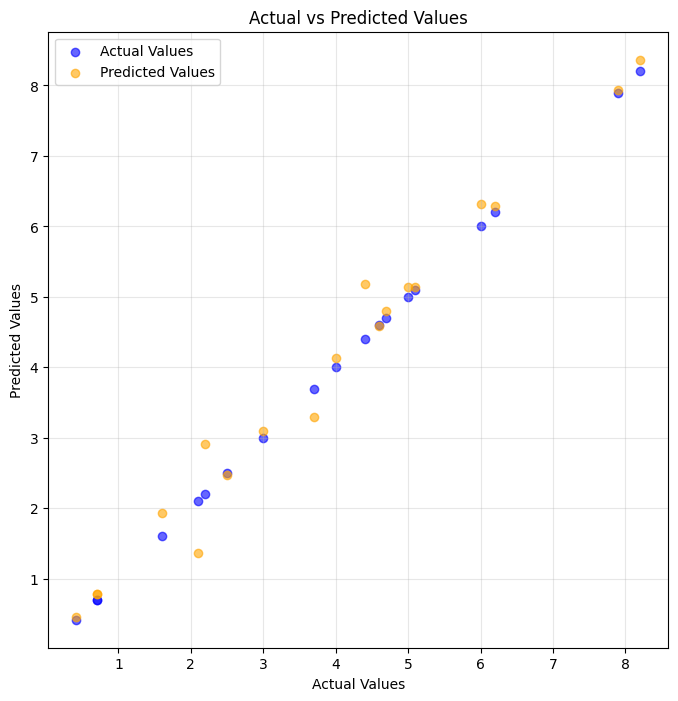

In [16]:
#sns.displot((y_test-predictions),bins=50,kde=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test_cleaned, y_pred, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [17]:
print("Actual vs Predicted Values:")
for actual, predicted in zip(y_test_cleaned[:], y_pred[:]): 
    print(f"Actual: {actual}, Predicted: {predicted[0]}")

Actual vs Predicted Values:
Actual: 3.7, Predicted: 3.2898635864257812
Actual: 4.0, Predicted: 4.1375861167907715
Actual: 3.0, Predicted: 3.0983188152313232
Actual: 7.9, Predicted: 7.929379940032959
Actual: 0.419, Predicted: 0.452669233083725
Actual: 0.7, Predicted: 0.7797072529792786
Actual: 6.0, Predicted: 6.320406436920166
Actual: 4.4, Predicted: 5.178664684295654
Actual: 2.5, Predicted: 2.4745540618896484
Actual: 5.0, Predicted: 5.134597301483154
Actual: 6.2, Predicted: 6.284205436706543
Actual: 2.1, Predicted: 1.3611106872558594
Actual: 4.7, Predicted: 4.793774127960205
Actual: 2.2, Predicted: 2.9088358879089355
Actual: 4.6, Predicted: 4.583195209503174
Actual: 0.7, Predicted: 0.7801363468170166
Actual: 1.6, Predicted: 1.9342787265777588
Actual: 5.1, Predicted: 5.141604900360107
Actual: 8.2, Predicted: 8.365710258483887


In [18]:
model.save('Wide_and_Deep_Model.h5')  

ANN With Dropout

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# model
model = Sequential([
    Input(shape=(X_train_cleaned.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),  # Dropout with 20%
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', 
              loss='mean_absolute_error',  # or 'mae'
              metrics=[metrics.MeanAbsoluteError(), metrics.MeanSquaredError()])

# Train 
history = model.fit(X_train_cleaned, y_train_cleaned, epochs=2000, batch_size=1, validation_split=0.3, verbose=1)

# Evaluate
y_pred = model.predict(X_test_cleaned)
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)
mae = mean_absolute_error(y_test_cleaned, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Epoch 1/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3208 - mean_absolute_error: 3.3208 - mean_squared_error: 15.0535 - val_loss: 2.4049 - val_mean_absolute_error: 2.4049 - val_mean_squared_error: 9.5238
Epoch 2/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4526 - mean_absolute_error: 2.4526 - mean_squared_error: 9.7689 - val_loss: 1.4251 - val_mean_absolute_error: 1.4251 - val_mean_squared_error: 3.8391
Epoch 3/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5306 - mean_absolute_error: 1.5306 - mean_squared_error: 3.5288 - val_loss: 0.7235 - val_mean_absolute_error: 0.7235 - val_mean_squared_error: 1.1704
Epoch 4/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9786 - mean_absolute_error: 0.9786 - mean_squared_error: 1.8868 - val_loss: 0.5824 - val_mean_absolute_error: 0.5824 - val_mean_squared_error: 0.8947
Epoch 5/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7527 - mean_absolute_error: 0.7527 - mean_squared_error: 1.1802 - val_loss: 0.5

In [20]:
print("Actual vs Predicted Values:")
for actual, predicted in zip(y_test_cleaned[:], y_pred[:]):  
    print(f"Actual: {actual}, Predicted: {predicted[0]}")

Actual vs Predicted Values:
Actual: 3.7, Predicted: 3.372805118560791
Actual: 4.0, Predicted: 4.2876200675964355
Actual: 3.0, Predicted: 2.964298963546753
Actual: 7.9, Predicted: 7.473913192749023
Actual: 0.419, Predicted: 0.6433515548706055
Actual: 0.7, Predicted: 0.9024553298950195
Actual: 6.0, Predicted: 5.78243350982666
Actual: 4.4, Predicted: 3.9898083209991455
Actual: 2.5, Predicted: 2.699925661087036
Actual: 5.0, Predicted: 5.297379016876221
Actual: 6.2, Predicted: 5.880383491516113
Actual: 2.1, Predicted: 1.4431416988372803
Actual: 4.7, Predicted: 4.8433074951171875
Actual: 2.2, Predicted: 2.6585850715637207
Actual: 4.6, Predicted: 4.424935817718506
Actual: 0.7, Predicted: 1.04575514793396
Actual: 1.6, Predicted: 2.3751163482666016
Actual: 5.1, Predicted: 4.98249626159668
Actual: 8.2, Predicted: 7.934208393096924


In [21]:
model.save('ANN_Dropout.h5')  # Save weights to an HDF5 file

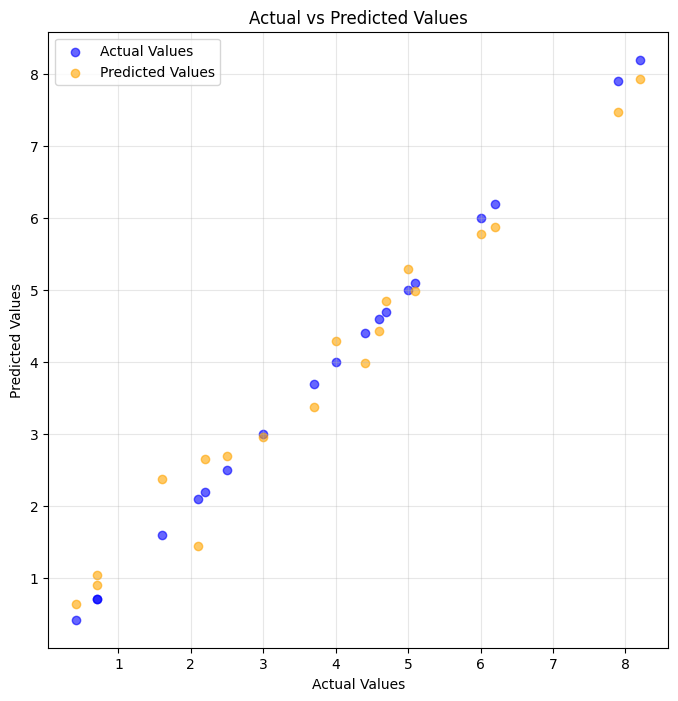

In [22]:
#sns.displot((y_test-predictions),bins=50,kde=True)

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test_cleaned, y_pred, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

ResNet Neural Network

In [23]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


inputs = Input(shape=(X_train_cleaned.shape[1],))
x = Dense(32, activation='relu')(inputs)
x = Dense(16, activation='relu')(x)
skip = Dense(16, activation='relu')(inputs) 
x = Add()([x, skip])
output = Dense(1)(x)

# model
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', 
              loss='mean_absolute_error',  # or 'mae'
              metrics=[metrics.MeanAbsoluteError(), metrics.MeanSquaredError()])

# Train 
history = model.fit(X_train_cleaned, y_train_cleaned, epochs=2000, batch_size=1, validation_split=0.3, verbose=1)

y_pred = model.predict(X_test_cleaned)
mse = mean_squared_error(y_test_cleaned, y_pred)
r2 = r2_score(y_test_cleaned, y_pred)
mae = mean_absolute_error(y_test_cleaned, y_pred)
rmse = np.sqrt(mse)

# Print metrics
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

Epoch 1/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 2.6633 - mean_absolute_error: 2.6633 - mean_squared_error: 10.6703 - val_loss: 1.5121 - val_mean_absolute_error: 1.5121 - val_mean_squared_error: 4.1175
Epoch 2/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1836 - mean_absolute_error: 1.1836 - mean_squared_error: 2.5323 - val_loss: 0.6622 - val_mean_absolute_error: 0.6622 - val_mean_squared_error: 0.7817
Epoch 3/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7125 - mean_absolute_error: 0.7125 - mean_squared_error: 0.9162 - val_loss: 0.6697 - val_mean_absolute_error: 0.6697 - val_mean_squared_error: 0.8828
Epoch 4/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5065 - mean_absolute_error: 0.5065 - mean_squared_error: 0.4403 - val_loss: 0.6422 - val_mean_absolute_error: 0.6422 - val_mean_squared_error: 1.3105
Epoch 5/2000
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4973 - mean_absolute_error: 0.4973 - mean_squared_error: 0.4730 - val_loss: 0.6

In [24]:
print("Actual vs Predicted Values:")
for actual, predicted in zip(y_test_cleaned[:], y_pred[:]): 
    print(f"Actual: {actual}, Predicted: {predicted[0]}")

Actual vs Predicted Values:
Actual: 3.7, Predicted: 3.400867462158203
Actual: 4.0, Predicted: 4.208820343017578
Actual: 3.0, Predicted: 3.060821056365967
Actual: 7.9, Predicted: 7.938897132873535
Actual: 0.419, Predicted: 0.43374285101890564
Actual: 0.7, Predicted: 0.6398463249206543
Actual: 6.0, Predicted: 6.741235733032227
Actual: 4.4, Predicted: 4.803828239440918
Actual: 2.5, Predicted: 2.4306893348693848
Actual: 5.0, Predicted: 5.236950874328613
Actual: 6.2, Predicted: 6.275104522705078
Actual: 2.1, Predicted: 1.40634024143219
Actual: 4.7, Predicted: 4.779334545135498
Actual: 2.2, Predicted: 2.7057080268859863
Actual: 4.6, Predicted: 4.520370960235596
Actual: 0.7, Predicted: 0.7484691739082336
Actual: 1.6, Predicted: 1.9750899076461792
Actual: 5.1, Predicted: 5.129921913146973
Actual: 8.2, Predicted: 8.336175918579102


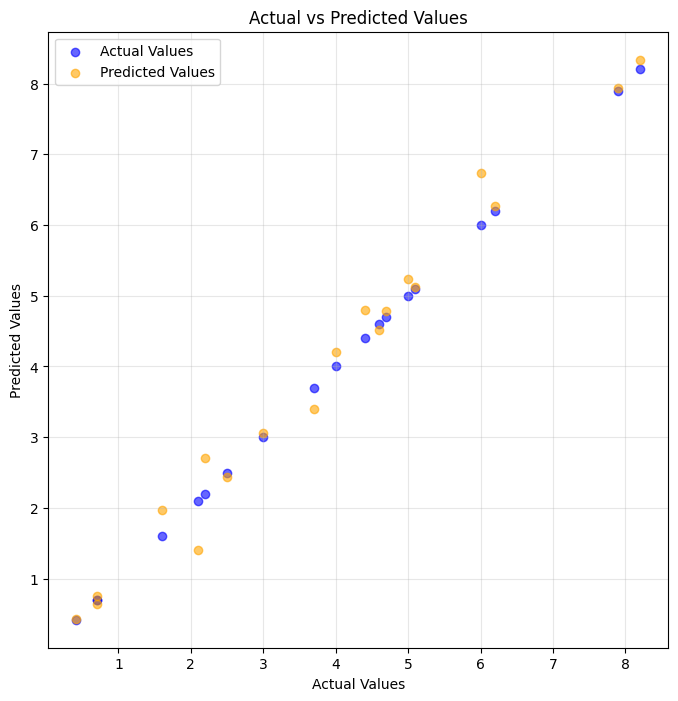

In [25]:
#sns.displot((y_test-predictions),bins=50,kde=True)
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', alpha=0.6, label="Actual Values")

# Scatter plot for predicted values
plt.scatter(y_test_cleaned, y_pred, color='orange', alpha=0.6, label="Predicted Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [26]:
model.save('ResNet_ANN.h5')  # Save weights to an HDF5 file

TESTING USING OWN DATASET

In [30]:
import joblib
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score

def load_and_preprocess_data(file_path, scaler):
    data = pd.read_csv(file_path)
    X = data.drop(columns=["efficiency"]).values  # Features
    y = data["efficiency"].values  # Target variable
    X_scaled = scaler.transform(X)  # Use the pre-fitted scaler
    return X_scaled, y

def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

def make_predictions(model, X):
    predictions = model.predict(X)
    return predictions

def evaluate_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R² Score: {r2}")
    return mse, r2

#configuration
input_file_path = 'test.csv'
#model_path = 'Wide_and_Deep_Model.h5'
#model_path = 'ANN_Dropout.h5'
model_path = 'ResNet_ANN.h5'
#model_path = 'FCN.h5'

# Load the pre-fitted scaler
scaler = joblib.load('scaler.pkl')

X_test_cleaned, y_test = load_and_preprocess_data(input_file_path, scaler)
model = load_model(model_path)
y_pred = make_predictions(model, X_test_cleaned)
evaluate_performance(y_test, y_pred)

# actual vs predicted values
print("Actual vs Predicted Values:")
for actual, predicted in zip(y_test[:], y_pred[:]):
    print(f"Actual: {actual}, Predicted: {predicted[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Mean Squared Error (MSE): 9.833923156672328e-05
R² Score: 0.9973722072384653
Actual vs Predicted Values:
Actual: 0.097, Predicted: 0.10758161544799805
Actual: 0.377, Predicted: 0.3845524191856384
Actual: 0.641, Predicted: 0.6436449289321899
Actual: 0.419, Predicted: 0.43374285101890564
